**EE-411 Homework 2 : Classifying digits & learning theory**

*Name : Palmisano*

*First Name : Fabio Nicola Edouard*

*Sciper = 296708*


**Part 1 : Classifying digits with Scikit-learn**

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

from sklearn.ensemble import RandomForestClassifier 


*1) Import and prepare the data :*

In [34]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

We did the loading of the data as describe in the homework description, and now we will just check the sape of the data (X) that we obtain and the labels (y)

In [35]:
print('The shape of the data (X) that we receive is :', X.shape)
print('The shape of the data (y) that we receive is :', y.shape)

The shape of the data (X) that we receive is : (1797, 64)
The shape of the data (y) that we receive is : (1797,)


<Figure size 640x480 with 0 Axes>

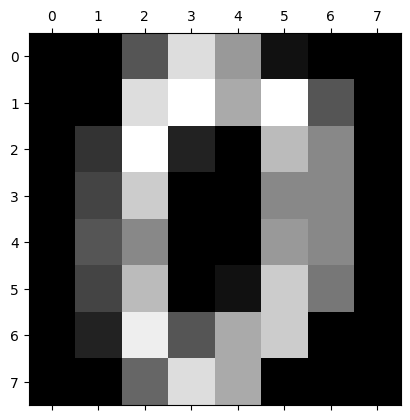

In [36]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [37]:
print(y)

[0 1 2 ... 8 9 8]


In [38]:
for i in range(len(y)): 
    if y[i] % 2 == 0 : 
        y[i] = 0
    else : 
        y[i] = 1

print(y)

[0 1 0 ... 0 1 0]


In [39]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, train_size = 0.7)

In [43]:
print('the size of train set is : ',x_train.shape)
print('the size of test set is : ', x_test.shape)

the size of train set is :  (1257, 64)
the size of test set is :  (540, 64)


In [54]:
print(f'The proportion of even number (0) in train set is is {(np.sum(y_train)/len(y_train))*100:.2f} %')
print(f'The proportion of odd number (1) in train set is is {(1-(np.sum(y_train)/len(y_train)))*100:.2f} %')


print('\n')

print(f'The proportion of even number (0) in test set is is {(np.sum(y_test)/len(y_test))*100:.2f} %')
print(f'The proportion of odd number (1) in test set is is {(1-(np.sum(y_test)/len(x_test)))*100:.2f} %')

The proportion of even number (0) in train set is is 48.53 %
The proportion of odd number (1) in train set is is 51.47 %


The proportion of even number (0) in test set is is 54.81 %
The proportion of odd number (1) in test set is is 45.19 %


We see that the both subsets have roughly the same proportion of labelled numbers.

*2) Logistic Regression*

In [60]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

X_fit = np.linspace(0,1,100)[:,np.newaxis]
y_fit = log_reg.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

c:\Users\goali\anaconda3\envs\scientific\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: X has 1 features, but LogisticRegression is expecting 64 features as input.

In [ ]:

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

In [ ]:
from sklearn.model_selection import GridSearchCV

#Train Set = TrainSet + ValidSet --> Test Set 

# Set up the grid search
#try all the neighbors form 1 to 20 
parameters = [{'n_neighbors': np.arange(1, 20)}]

clf = GridSearchCV(
    neighbors.KNeighborsClassifier(), 
    parameters)
clf.fit(X, y)

# Print results
#Best Parameteres
print(clf.best_params_)

#Mean Test Score 
print(clf.cv_results_["mean_test_score"])